<a href="https://colab.research.google.com/github/puneat/FuturesBacktestSystem/blob/main/BackTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/puneat/FuturesBacktestSystem.git

!cp /content/FuturesBacktestSystem/strategyClasses.py .
!cp /content/FuturesBacktestSystem/BackTest.py .
!cp /content/FuturesBacktestSystem/DataProcessing.py .

url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
!pip3 install pyalgotrade

Cloning into 'FuturesBacktestSystem'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 92 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (92/92), done.
Selecting previously unselected package libta-lib0.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.4) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 5.0MB/s 
  Created wheel for ta-lib: filen

In [ ]:
from __future__ import print_function
from pyalgotrade import plotter
from pyalgotrade.stratanalyzer import returns
from pyalgotrade.talibext import indicator
import matplotlib.pyplot as plt
from datetime import datetime
from pyalgotrade.barfeed.csvfeed import GenericBarFeed
from pyalgotrade.bar import Frequency
import pandas as pd
import strategyClasses
import BackTest
from DataProcessing import process_data, metrics
import talib
from talib import MA_Type
import numpy as np

# import talib
plt.rcParams['figure.figsize'] = (30.0, 15.0)

In [ ]:
df = pd.read_csv("/content/FuturesBacktestSystem/data/ZS_C1_15m.csv")

In [ ]:
trix = talib.TRIX(df.Close, 2)

In [ ]:
trix[0]

False

In [ ]:
df.High += 15
df.Open += 15
df.Low += 15
df.Close += 15
df['Adj Close'] += 15

2021-02-21 16:13:10,854 numexpr.utils [INFO] NumExpr defaulting to 2 threads.


In [ ]:
df.to_csv('/content/ZS_C1C2_15m_shifted.csv')

In [ ]:
from pyalgotrade.barfeed.csvfeed import GenericBarFeed
from pyalgotrade.bar import Frequency
from pyalgotrade import strategy
from pyalgotrade.technical import ma
from pyalgotrade.technical import rsi
from pyalgotrade.technical import cross
from pyalgotrade.technical.bollinger import BollingerBands
from pyalgotrade.technical.macd import MACD
from pyalgotrade.technical.stoch import StochasticOscillator
from pyalgotrade.broker.backtesting import Broker
from pyalgotrade.technical.vwap import VWAP
from pyalgotrade import plotter
from pyalgotrade.stratanalyzer import trades
from pyalgotrade.stratanalyzer import returns
from pyalgotrade import broker as basebroker

class TRIX_talib():
    def __init__(self, #fixed
               priceDS, #fixed
               priceBarDS,  #fixed
               trixFarPeriod = 14,
               trixNearPeriod = 7): #custom
    # prices
        self.priceDS = priceDS
        self.priceBarDS = priceBarDS
        self.trixNearPeriod = trixNearPeriod
        self.trixFarPeriod = trixFarPeriod



    def enterLongSignal(self, extPriceBarDS, extPriceDS):
        trixNear = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixNearPeriod)
        
        trixFar = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixFarPeriod)
        
        longEntryFilter_1 = cross.cross_above(trixNear, trixFar) > 0

        return longEntryFilter_1

    def exitLongSignal(self, longPos, extPriceBarDS, extPriceDS):
        trixNear = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixNearPeriod)
        
        trixFar = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixFarPeriod)
        
        longExitFilter_1 = cross.cross_below(trixNear, trixNear[:-1]) > 0


        longExitFilter_2 = longPos.exitActive()

        return longExitFilter_1 and not longExitFilter_2

    def enterShortSignal(self,extPriceBarDS, extPriceDS):
        trixNear = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixNearPeriod)
        
        trixFar = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixFarPeriod)
        
        shortEntryFilter_1 = cross.cross_below(trixNear, trixFar) > 0

        return shortEntryFilter_1

    def exitShortSignal(self, shortPos, extPriceBarDS, extPriceDS):
        trixNear = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixNearPeriod)
        
        trixFar = indicator.TRIX(extPriceDS,
                              count = 100,
                              timeperiod = self.trixFarPeriod)
        
        shortExitFilter_1 = cross.cross_above(trixNear, trixNear[:-1]) > 0

        shortExitFilter_2 = shortPos.exitActive()

        return shortExitFilter_1 and not shortExitFilter_2

In [ ]:
def testStrategy(plot):
    instrument = 'ZS'
    # Load the bars.
    feed = GenericBarFeed(Frequency.TRADE, timezone=None, maxLen=13000)
    feed.setDateTimeFormat("%Y-%m-%d %H:%M:%S")
    feed.addBarsFromCSV(instrument,'/content/FuturesBacktestSystem/data/ZS_C1_15m.csv')
    #feed.addBarsFromCSV(instrument,'/content/ZS_C1C2_15m_shifted')
    priceDS = feed[instrument].getPriceDataSeries()
    priceBarDS = feed.getDataSeries(instrument)

    #create desired strategy class object
    # strat = strategyClasses.BO_RSI_SO_talib(priceDS,
    #                        priceBarDS,
    #                        bBandsPeriod = 22,
    #                        rsiPeriod = 14,
    #                        soPeriod = 14,
    #                        soDPeriod=3,
    #                        overBoughtThreshold = 70,
    #                        overSoldThreshold = 30,
    #                        numStdDev = 3)
    
    strat = TRIX_talib(priceDS,
                       priceBarDS,
                       trixFarPeriod = 20,
                       trixNearPeriod = 7)

    # pass strategy to backtest system
    back = BackTest.BacktestSystem(feed,
                          instrument = instrument,
                          strategyClass = strat,
                          payupTicks = 0,
                          stopLossTicks = 4,
                          tickValue = 0.25,
                          startingMoney = 100000, # in cents
                          GTC = False,
                          AON = False,
                          lotSize = 1,
                          printOrders = False)
    
    # attach return analyzer
    retAnalyzer = returns.Returns()
    back.attachAnalyzer(retAnalyzer)

    tradeAnalyzer = trades.Trades()
    back.attachAnalyzer(tradeAnalyzer)


    if plot:
        plt = plotter.StrategyPlotter(back, True, True, False)
        # plt.getInstrumentSubplot(instrument).addDataSeries("upper", strat.bbands.getUpperBand())
        # plt.getInstrumentSubplot(instrument).addDataSeries("middle", strat.bbands.getMiddleBand())
        # plt.getInstrumentSubplot(instrument).addDataSeries("lower", strat.bbands.getLowerBand())

    back.run()

    print("Strategy P&L: Ticks", (back.getResult()-back.startingMoney)/back.tickValue)
    print("Total Trades: ", (tradeAnalyzer.getCount()))
    print("Unprofitable Trades: ", (tradeAnalyzer.getUnprofitableCount()))
    print("Profitable Trades: ", (tradeAnalyzer.getProfitableCount()))
    print("Break-Even Trades: ", (tradeAnalyzer.getEvenCount()))

    metrics(tradeAnalyzer)

    trades_pnl = tradeAnalyzer.getAll()
    trades_ret = tradeAnalyzer.getAllReturns()

    if plot:
        plt.plot(fromDateTime=datetime.strptime("01-01-2020", '%d-%m-%Y'), toDateTime=datetime.strptime("01-02-2020", '%d-%m-%Y'))

    return trades_pnl, trades_ret

Strategy P&L: Ticks 43.0
Total Trades:  686
Unprofitable Trades:  392
Profitable Trades:  262
Break-Even Trades:  32

Total trades: 686
Avg. profit: $ 0
Profits std. dev.: $ 3
Max. profit: $31
Min. profit: $-8
Avg. return:  0 %
Returns std. dev.:  0 %
Max. return:  3 %
Min. return: -1 %

Profitable trades: 262
Avg. profit: $ 3
Profits std. dev.: $ 3
Max. profit: $31
Min. profit: $ 0
Avg. return:  0 %
Returns std. dev.:  0 %
Max. return:  3 %
Min. return:  0 %

Unprofitable trades: 392
Avg. loss: $-2
Losses std. dev.: $ 1
Max. loss: $-8
Min. loss: $-0
Avg. return: -0 %
Returns std. dev.:  0 %
Max. return: -0 %
Min. return: -1 %


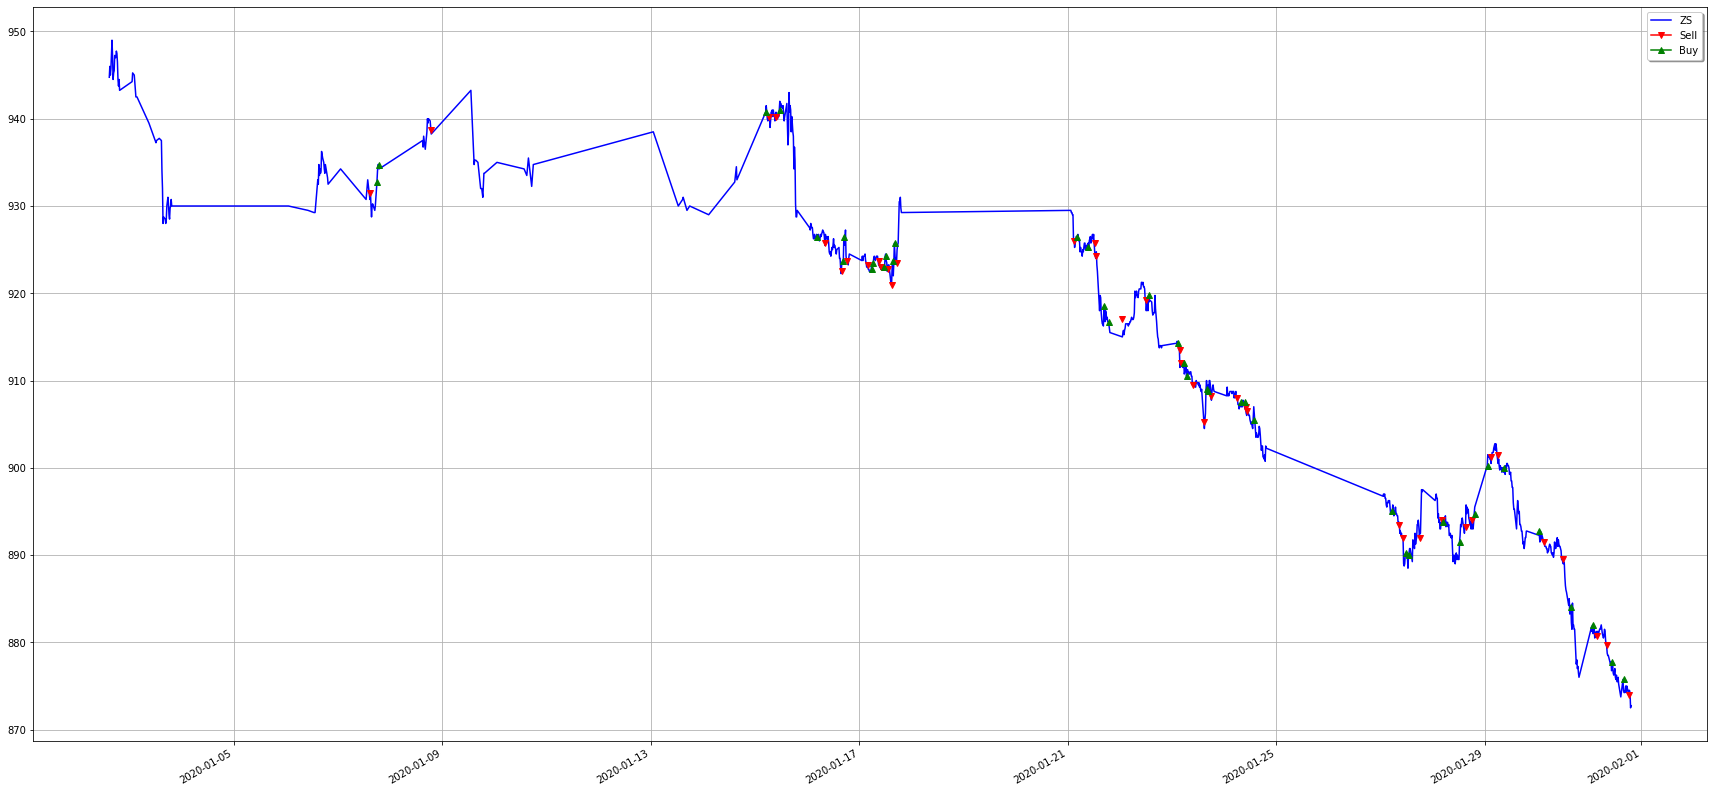

In [ ]:
pnl, ret = testStrategy(True)

<BarContainer object of 92 artists>

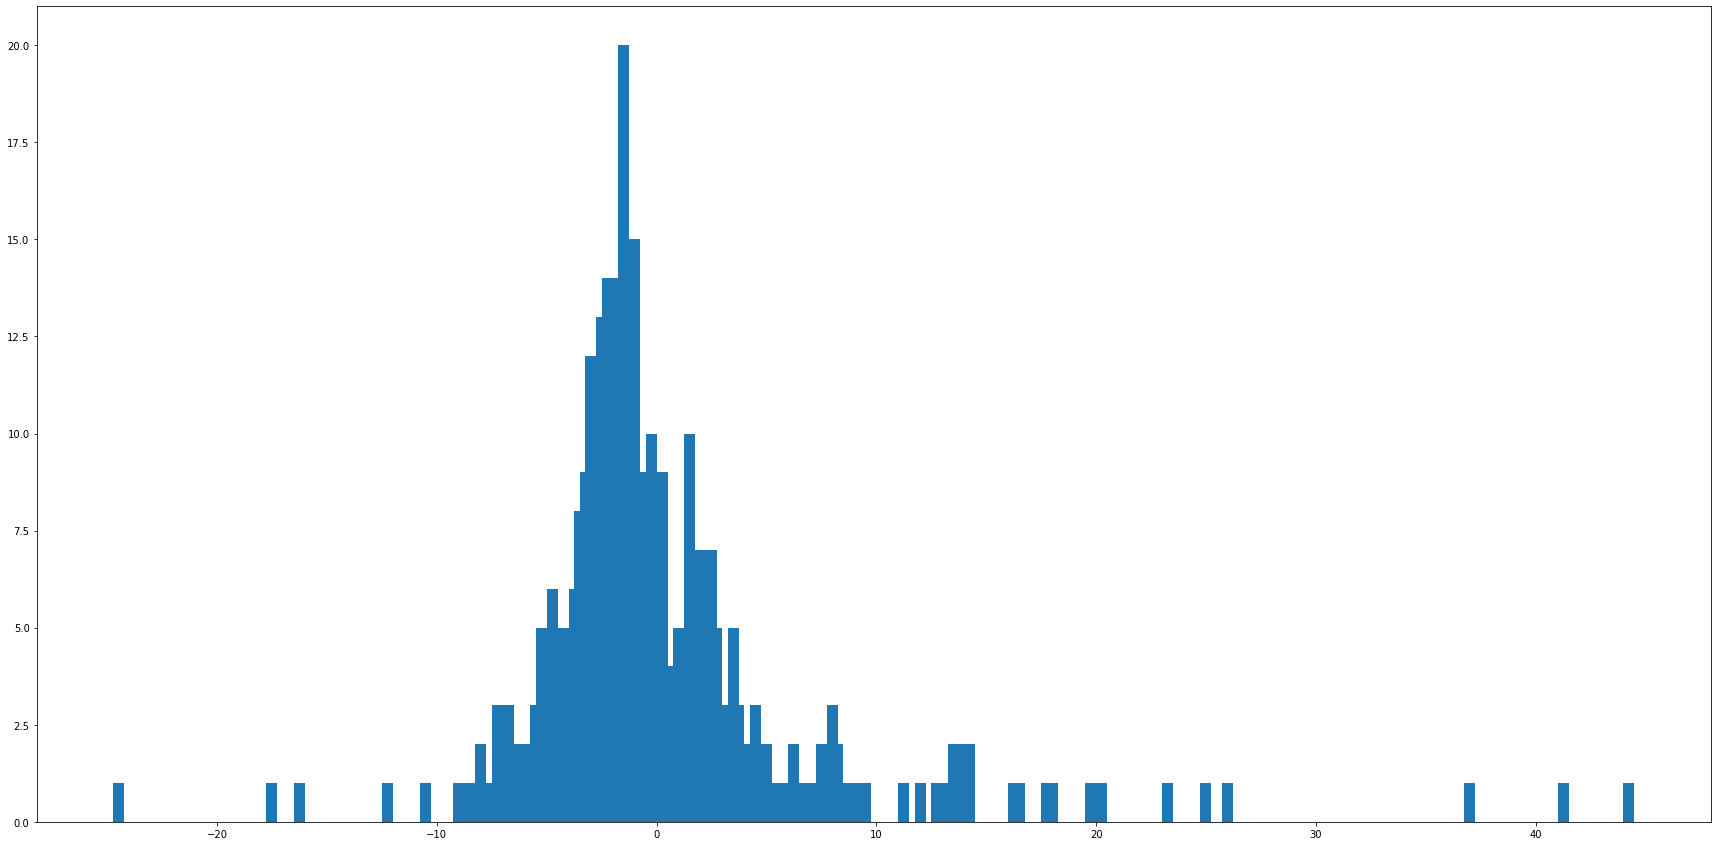

In [ ]:
import numpy as np

vals = np.unique(pnl,return_counts=True)

plt.bar(vals[0],vals[1], width=0.5)

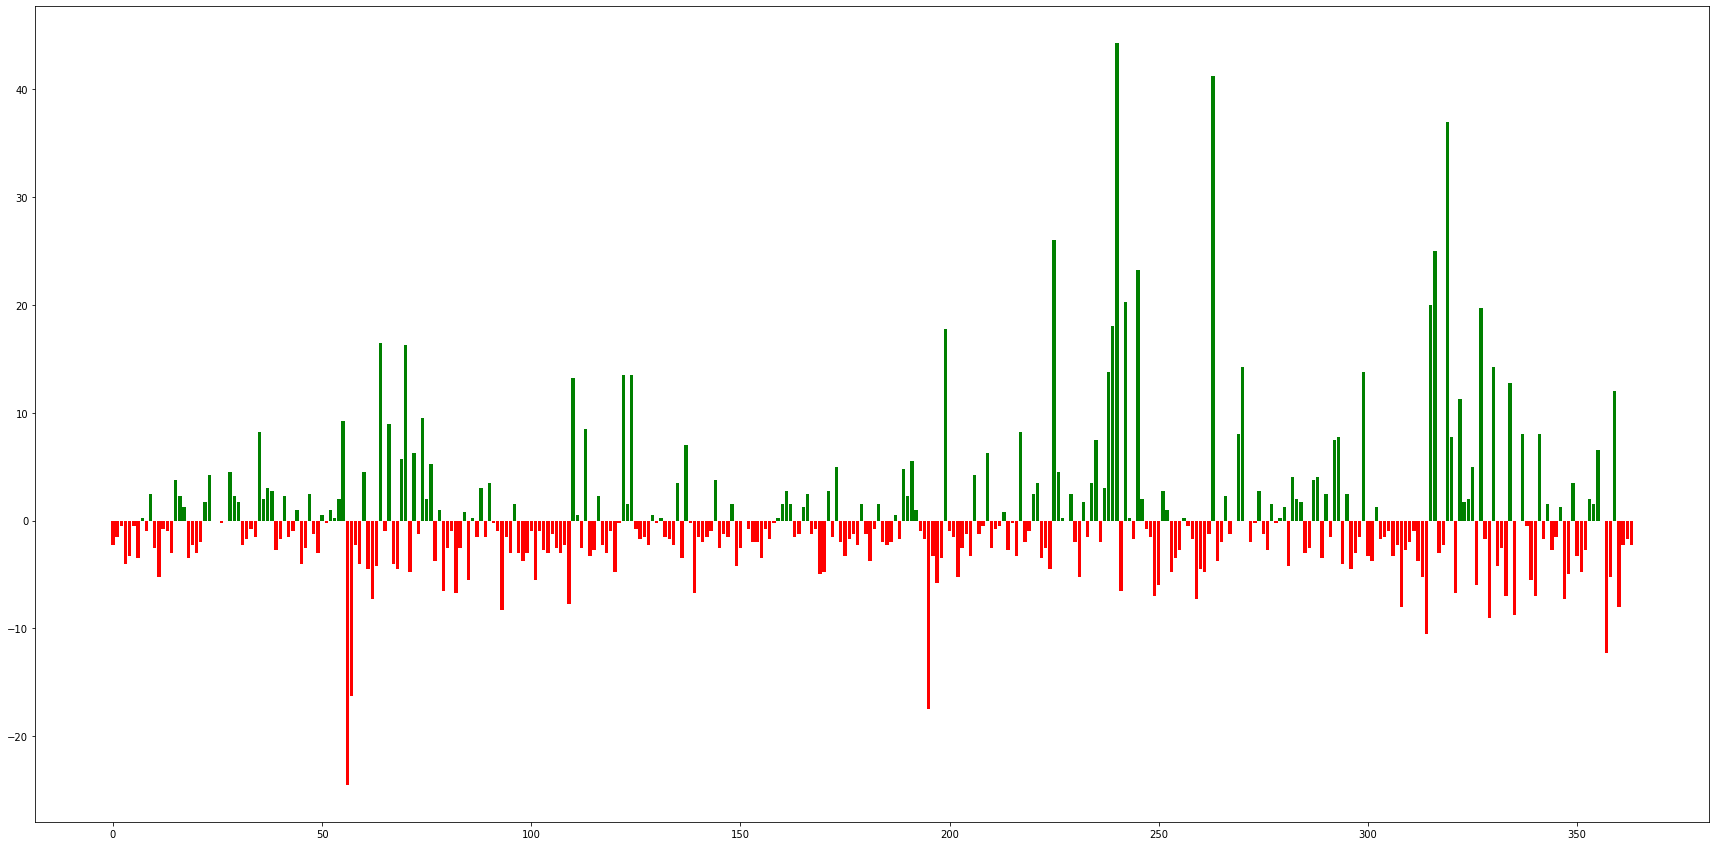

In [ ]:
for i in range(0,len(pnl)):
  if pnl[i]>0:
    plt.bar(i,pnl[i], color='green')

  if pnl[i]<0:
    plt.bar(i,pnl[i], color='red')

  if pnl[i]==0:
    plt.bar(i,pnl[i], color='black')

plt.show()